In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [6]:
plt.rcParams['figure.figsize'] = [16, 4]

In [15]:
data = pd.read_csv("../data/tabla_generacion_energia.csv", parse_dates=["fecha"], index_col="fecha")

In [98]:
potencia = pd.read_csv("../data/potencia.csv", parse_dates=["fecha"], index_col="fecha")

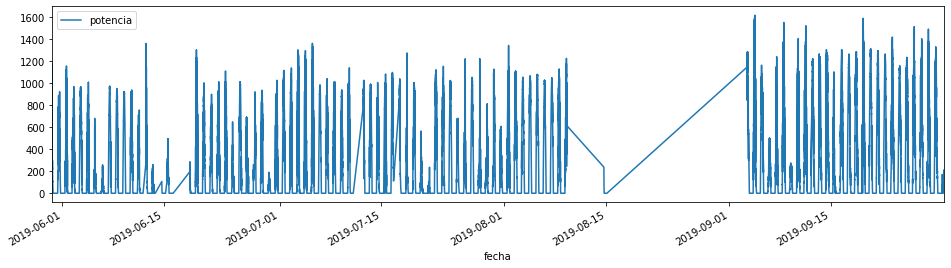

In [99]:
potencia.plot()

In [100]:
potencia["mes"] = potencia.index.month
potencia["dia"] = potencia.index.day
potencia["hora"] = potencia.index.hour

In [150]:
resampled = potencia.resample("15T").mean()

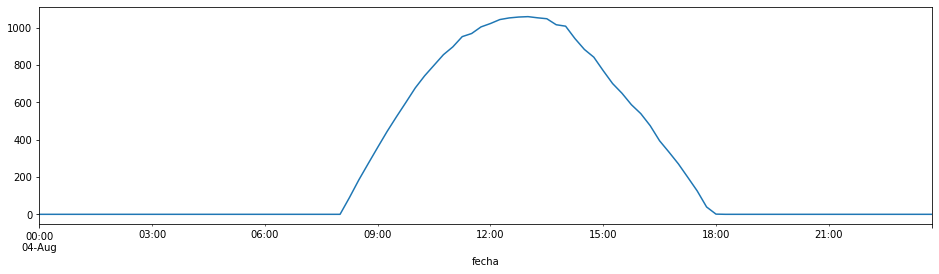

In [151]:
resampled.loc[(resampled.mes == 8) & (resampled.dia == 4), "potencia"].plot()

In [153]:
reference_curve =  resampled.loc[(resampled.mes == 8) & (resampled.dia == 4), "potencia"]

In [155]:
reference_curve = reference_curve.reset_index().drop(columns = "fecha")

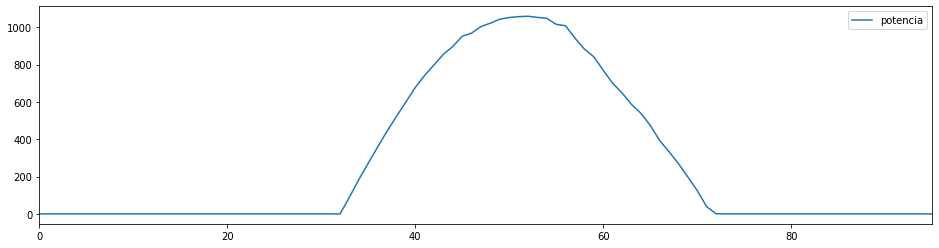

In [187]:
reference_curve.resampleplot()

In [159]:
ref_power_gen = pd.concat([reference_curve for k in range(90)], ignore_index=True)

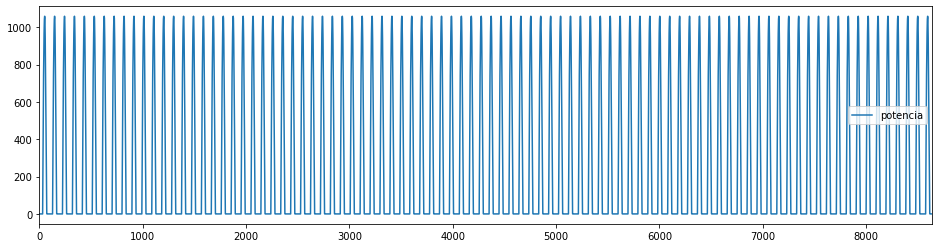

In [160]:
ref_power_gen.plot()

In [170]:
potencia_h = potencia.resample("H").mean()

In [188]:
potencia_q = potencia.resample("15T").mean()

In [190]:
target = potencia_q.loc[potencia_q.mes == 7, "potencia"]

In [191]:
target = target.asfreq("15T")

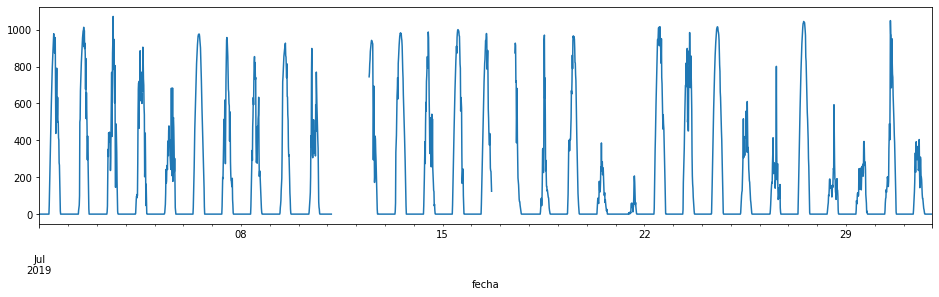

In [192]:
target.plot()

In [194]:
24*15

360

In [226]:
ref_power_gen = pd.concat([reference_curve for k in range(31)], ignore_index=True)
ref_power_gen.index = target.index
ref_power_gen = ref_power_gen.potencia

In [236]:
normalized_power_gen = target / ref_power_gen

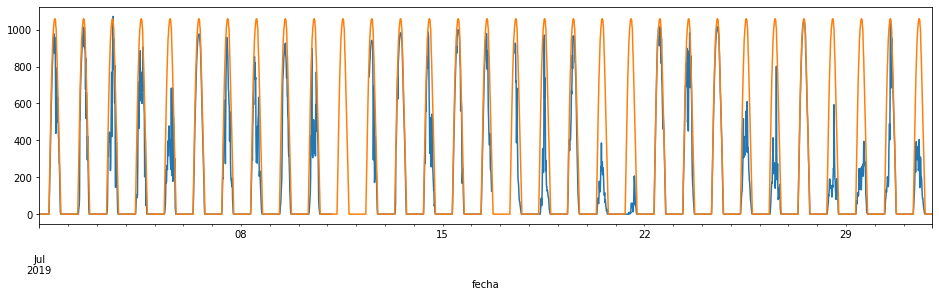

In [242]:
target.plot()
ref_power_gen.plot()

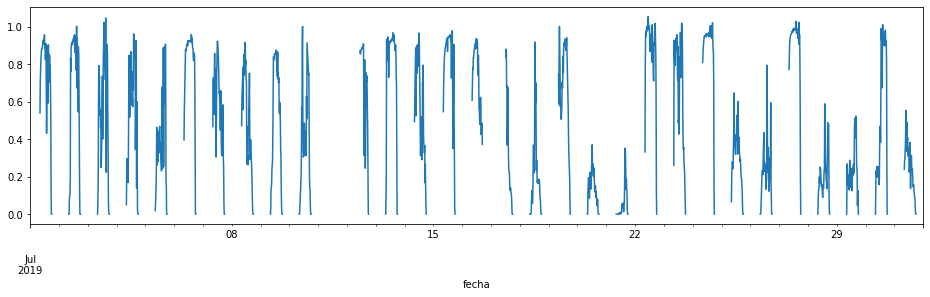

In [237]:
normalized_power_gen.plot()

In [238]:
normalized_power_gen = normalized_power_gen.asfreq("15T")

In [239]:
normalized_power_gen = normalized_power_gen[normalized_power_gen > 0.4].asfreq("15T")

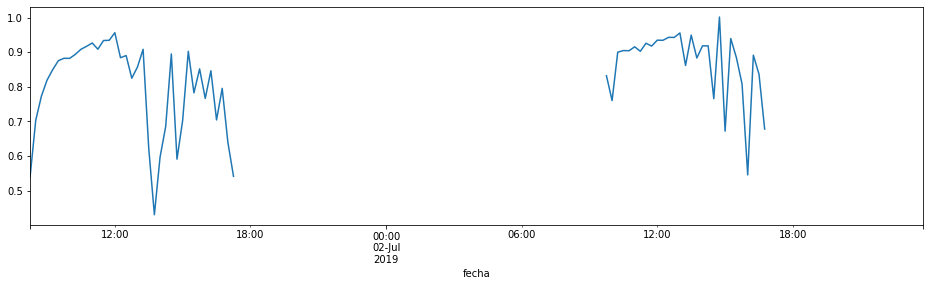

In [240]:
normalized_power_gen["2019-07-01":"2019-07-02"].plot()

In [181]:
ref_power_gen = pd.concat([reference_curve for k in range(31)], ignore_index=True)

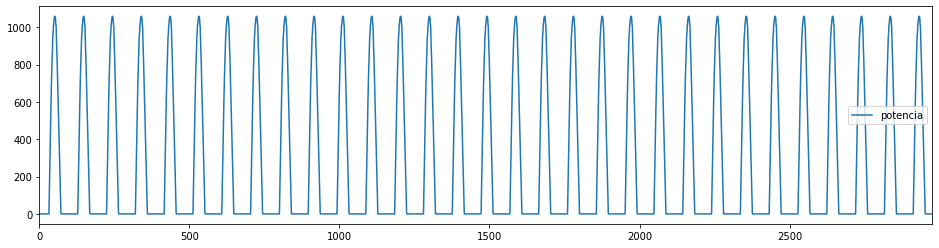

In [182]:
ref_power_gen.plot()

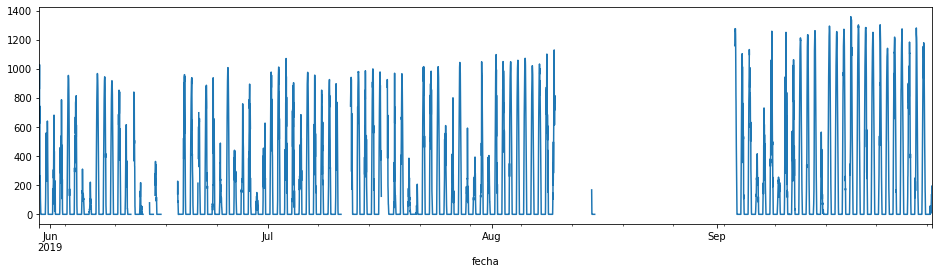

In [163]:
ref_power_gen = pd.concat([reference_curve for k in range(len())], ignore_index=True)
ref_power_gen = 
normalized = resampled.potencia

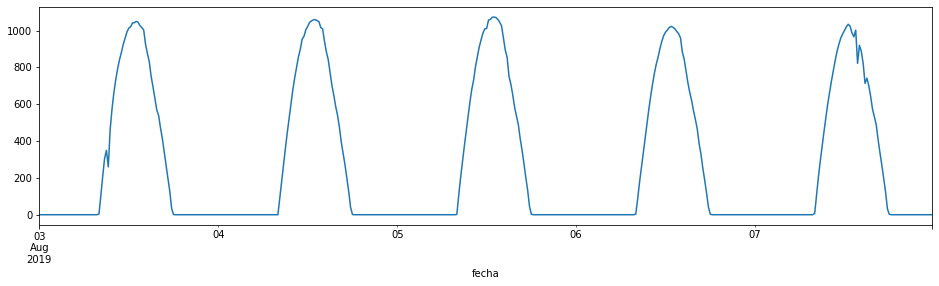

In [143]:
resampled.loc[(resampled.mes == 8) & (resampled.dia.isin(range(3,8))), "potencia"].plot()

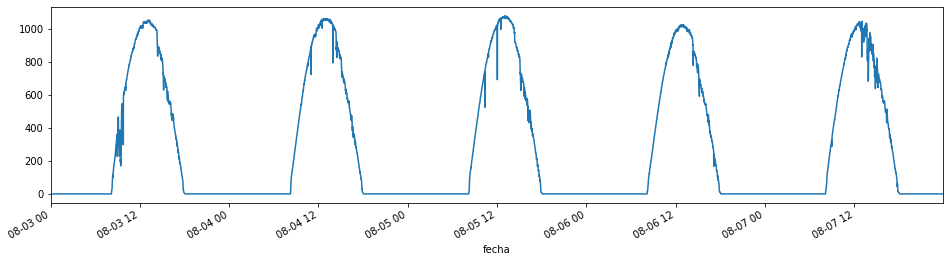

In [104]:
potencia.loc[(potencia.mes == 8) & (potencia.dia.isin(range(3,8))), "potencia"].plot()

In [105]:
y = potencia.loc[(potencia.mes == 8) & (potencia.dia.isin(range(3,8))), "potencia"]

(-10, 900)

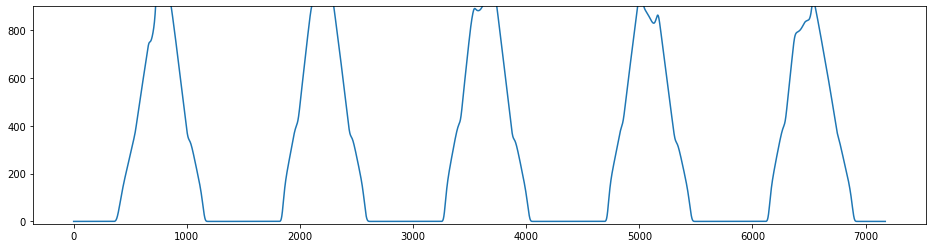

In [130]:
res = lowess(y, range(len(y)), frac=0.05, it=3, )
plt.plot(res[:,1])
plt.ylim((-10,900))

In [8]:
potencia = potencia.resample("H").mean()

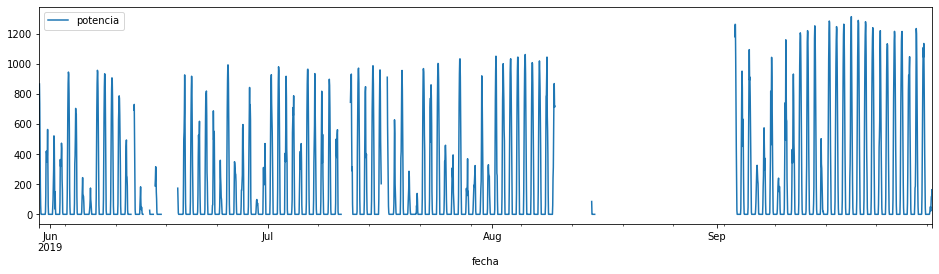

In [9]:
potencia.plot()

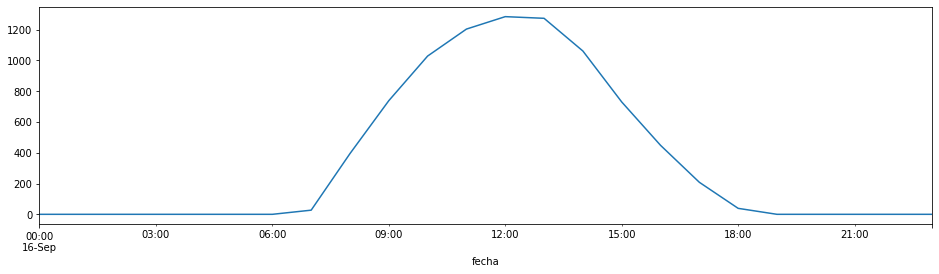

In [94]:
potencia[(potencia.mes == 9) & (potencia.dia == 16)].potencia.plot()

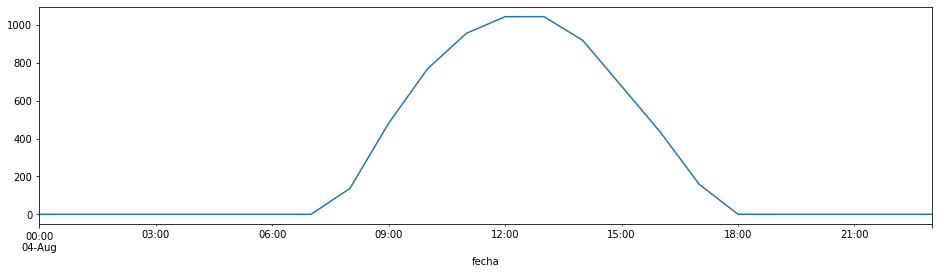

In [97]:
potencia[(potencia.mes == 8) & (potencia.dia == 4)].potencia.plot()

In [61]:
sample = potencia[(potencia.mes == 9) & (potencia.dia.isin(range(16,23)))]

In [63]:
y = sample.potencia
x = sample.index

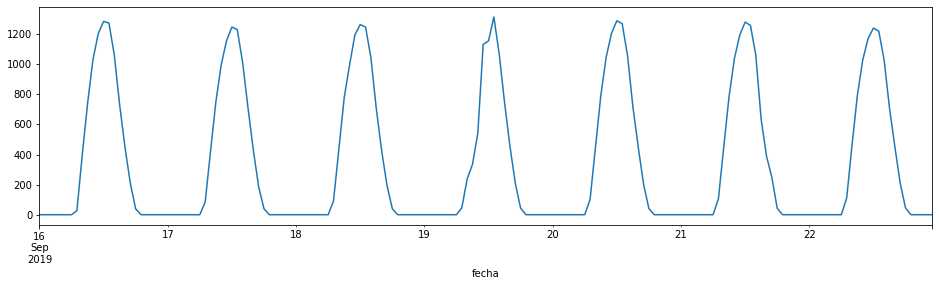

In [65]:
y.plot()

In [84]:
y.loc[]

fecha
2019-09-16 00:00:00    0.0
2019-09-16 01:00:00    0.0
2019-09-16 02:00:00    0.0
2019-09-16 03:00:00    0.0
2019-09-16 04:00:00    0.0
                      ... 
2019-09-22 19:00:00    0.0
2019-09-22 20:00:00    0.0
2019-09-22 21:00:00    0.0
2019-09-22 22:00:00    0.0
2019-09-22 23:00:00    0.0
Freq: H, Name: potencia, Length: 168, dtype: float64

In [82]:
res = lowess(endog=y, exog=np.array(range(len(y))), frac=0.03)

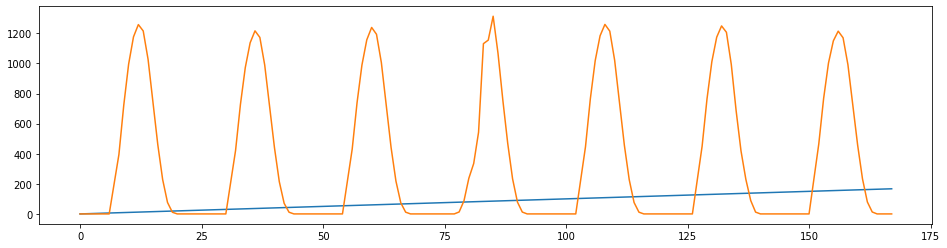

In [83]:
plt.plot(res)

In [ ]:
potencia[(potencia.mes == 9) & (potencia.dia > )]

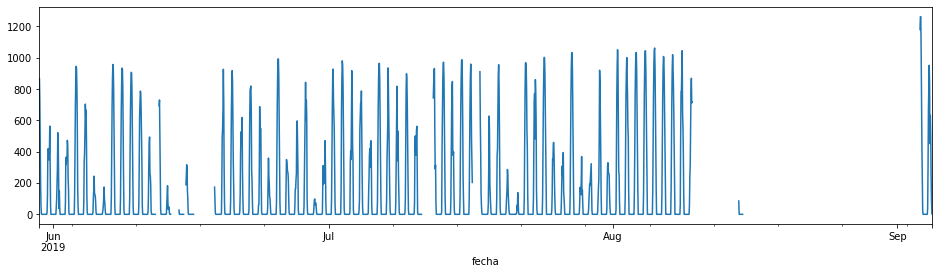

In [18]:
data.potencia.plot()

In [24]:
data["mes"] = data.index.month
data["dia"] = data.index.day
data["hora"] = data.index.hour

In [46]:
sample = data.loc[(data.mes == 8) & (data.dia <= 7), ["potencia", "nub"]]

In [48]:
sample[sample.index.hour == 12]

,potencia,nub
fecha,,
2019-08-01 12:00:00,1051.000000,4.0
2019-08-02 12:00:00,1001.250000,0.0
2019-08-03 12:00:00,1029.266667,5.0
2019-08-04 12:00:00,1044.066667,1.0
2019-08-05 12:00:00,1049.916667,1.0
2019-08-06 12:00:00,1008.067797,0.0
2019-08-07 12:00:00,1019.466667,0.0


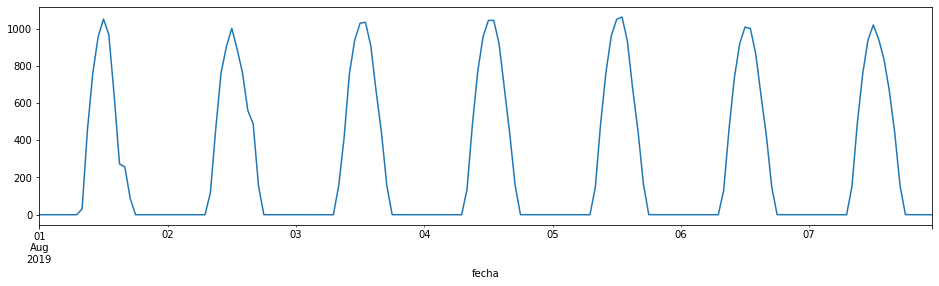

In [49]:
sample.potencia.plot()

In [25]:
data.loc[(data.potencia >= 1000) & (data.hora == 12), "dia"]

fecha
2019-07-24 12:00:00    24
2019-07-27 12:00:00    27
2019-08-01 12:00:00     1
2019-08-02 12:00:00     2
2019-08-03 12:00:00     3
2019-08-04 12:00:00     4
2019-08-05 12:00:00     5
2019-08-06 12:00:00     6
2019-08-07 12:00:00     7
2019-09-03 12:00:00     3
Name: dia, dtype: int64

In [40]:
ix = data.loc[(data.potencia >= 1000)].index.date

In [42]:
data.loc[data.index.date.isin(ix), "potencia"]

AttributeError: 'numpy.ndarray' object has no attribute 'isin'

In [33]:
ix = data.loc[(data.potencia >= 1000), ["mes", "dia"]]
ix

,mes,dia
fecha,,
2019-07-24 12:00:00,7,24
2019-07-24 13:00:00,7,24
2019-07-27 12:00:00,7,27
2019-07-27 13:00:00,7,27
2019-08-01 12:00:00,8,1
2019-08-02 12:00:00,8,2
2019-08-03 12:00:00,8,3
2019-08-03 13:00:00,8,3
2019-08-04 12:00:00,8,4


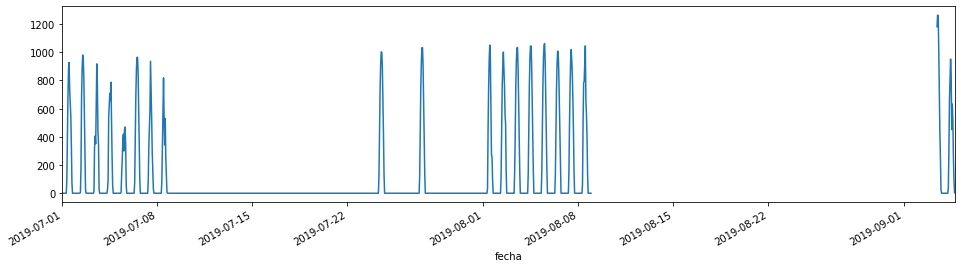

In [37]:
data.loc[(data.mes.isin(ix.mes)) & (data.dia.isin(ix.dia)), "potencia"].plot()